# Foundations of Data Visualizations
        
The following is true for any data visualization, and is especially important when creating accessibile visualizations. A concise and coherent concept ensures users of all abilities can engage with your visualization. Put the numbers aside for a moment and ask yourself these questions:

**What story does the data tell?** 
* Make the relationships or features you want to highlight stand out
* Provide context but eliminate clutter or irrelevant data
* For complex stories: break it in to smaller simpler chunks

**How should the reader benefit from the visualization?** Consider how your graph will help the user understand insights from the data. Like in the previous example, layer in context to pull those learnings to the surface.

**Can you understand it in 5 seconds?** If the visual adds more complexity than your written word would otherwise, think about whether you need it in the first place.


<h3>Visualization Evalutation Checklist</h3>

**Legibility**

* Is it immediately understandable?  If not, is it **understandable after a short period of study**?
* Does it **provide insight or understanding** better than some alternative visualization would?  Or does it require excessive cognitive effort?
* Does it provide insight or understanding that was not obtainable with the original representation (text, table, etc)?
* Is the design visually appealing/aesthetically pleasing?

**Context**
* Does the visualization reveal trends, patterns, gaps, and/or outliers? Can the viewer **make effective comparisons**?
* Does the visualization successfully **highlight important information, while providing context for that information**?
* What kind of visualization might have been better?
* Is it memorable?


**Integrity**
* Does it use visual components properly? That is, does it **properly represent the data using lines, color, position**, etc? 
* Does it **use labels and legends** appropriately?
* Does it transform nominal, ordinal, and quantitative information properly?
* Does it distort the information?  If it transforms it in some way, is this misleading or helpfully simplifying?
* Does it omit important information?    



# Introduction to Seaborn

    
<img src="./support_files/images/data_viz/seaborn_logo.png" width='600' /> 
<br>
<p><b>Seaborn</b> is a library for making statistical graphics in Python. It builds on top of <code>Matplotlib</code> and integrates closely with <code>pandas</code> data structures. Because Seaborn is essentially a wrapper for Matplotlib there are many Matplotlib conventions and functions that we will use in almost all of our plots regardless of whether they are seaborn or Matplotlib plots. We recommend you familiarize yourself with Matplotlib and Pandas before embarking on Seaborn. There will be refreshers throughout this module, but it is best if this is not the first time you're reading some of these concepts.
    
<p>Seaborn helps you explore and understand your data. Its plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic mapping and statistical aggregation to produce informative plots. Its dataset-oriented, declarative API lets you focus on what the different elements of your plots mean, rather than on the details of how to draw them.
<p>
<h3>Pros:</h3>
<ul>
<li>Simple declarative API is easy to get started with
<li>Quick and easy to update plots
<li>Handles data aggregation by default
<li><a href=" https://seaborn.pydata.org/api.html">Well documented API</a> 
<li>Works with Pandas dataframes and tabular data, lists & arrays.
<li>Comes with many prepackaged Python distros (anaconda, WinPython, etc.).
<li>Easily saves plots to image (.png, .bmp, etc.) and vector (.svg, .pdf, etc.) formats.
<li>Has an excellent set of examples (with code) within the API and  <a href="https://seaborn.pydata.org/examples/index.html">seaborn gallery</a>
<li>Opinionated
</ul>

<p>
<h3>Cons:</h3>
<ul>
<li>Opinionated 
<li>Not as flexible as Matplotlib
<li>Abstracted statistical analysis: some statistics are done behind the scenes so you have less control or visibility into what is being done.
</ul>
</div>

In [1]:
%pip install seaborn

{
    "tags": [
        "remove-cell"
    ]
}



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


{'tags': ['remove-cell']}

In [2]:
import os
import numpy as np
import pandas as pd


# main plotting packages
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# load the data
csv_path = os.path.join('./support_files', 'datasets', 'cars_dataset.csv')
cars = pd.read_csv(csv_path)
# pd.set_option('display.max_rows', cars.shape[0]+1) <- the second argument will set the max rows displayed

# view the data
cars

,Make,Model,Origin,Year,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration
0,Chevrolet,Chevelle Malibu,US,70,18.0,8,307.0,130,3504,12.0
1,Buick,Skylark 320,US,70,15.0,8,350.0,165,3693,11.5
2,Plymouth,Satellite,US,70,18.0,8,318.0,150,3436,11.0
3,AMC,Rebel SST,US,70,16.0,8,304.0,150,3433,12.0
4,Ford,Torino,US,70,17.0,8,302.0,140,3449,10.5
...,...,...,...,...,...,...,...,...,...,...
401,Ford,Mustang GL,US,82,27.0,4,140.0,86,2790,15.6
402,Volkswagen,Pickup,Europe,82,44.0,4,97.0,52,2130,24.6
403,Dodge,Rampage,US,82,32.0,4,135.0,84,2295,11.6
404,Ford,Ranger,US,82,28.0,4,120.0,79,2625,18.6


### Matplotlib Code Basics
    
* create a figure: <code>fig, ax = plt.subplots()</code>
    * Adjust figure size: <code>fig, ax = plt.subplots(figsize = (horizontal, vertical)</code>
    * Multiple plots per figure: <code>fig, ax = plt.subplots(n_rows, n_columns)</code>
        * Note!: we will cover this more in-depth later!

* add title: <code>ax.set_title('plot title')</code>
* set x label: <code>ax.set_xlabel('x label')</code>
* set y label: <code>ax.set_ylabel('y label')</code>

### Bar Plots

Seaborn has two options for barplots:

**[.countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html):**
plots the frequency of categorical variables

* Basic countplot: <code>sns.countplot(data = df, x = 'column', )</code>


**[.barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot):**
Represents an estimate of central tendency for a numeric variable as the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars. Seaborn handles aggregation automatically, and uses <b>mean</b> as the default aggregator.
* The <code>estimator</code> argument can be changed to different measurements of central tendancy such as median
* Basic barplot: <code>sns.barplot(data = df, x = 'column', y= 'column")</code>
    
**Helpful Parameters:**
* <code>x, y</code>: Axis to plot on, x is a vertical plot, y is a horizontal plot
* <code>order</code>: Order to plot the categorical levels in, otherwise the levels are inferred from the data objects.
* <code>color</code>: Color for all of the elements, or seed for a gradient palette.

<Axes: xlabel='Origin', ylabel='count'>

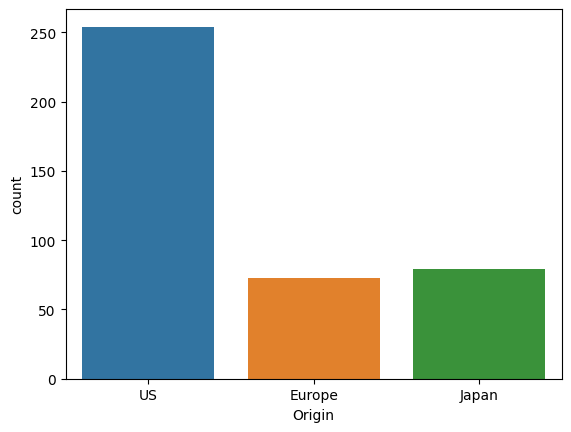

In [4]:
sns.countplot(x='Origin', data = cars, hue = 'Origin')

<Axes: xlabel='Origin', ylabel='MPG'>

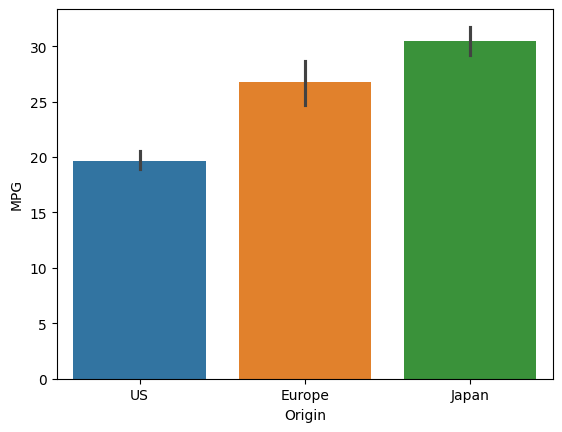

In [5]:
sns.barplot(x='Origin', y='MPG', data = cars, hue = 'Origin')

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**Exercise 10.1:** 
Lets combine some Pandas filtering with UX aesthetics to create a barplot that looks like the "best" example. 
    
    
* Filter the cars dataframe to just Japanese origin
* Set up the axis so it plots horizontally
* Make a countplot of "Make"
* Order the data by Make counts (hint, you can use <code>.value_counts().index</code>)
</div>

<Axes: xlabel='count', ylabel='Make'>

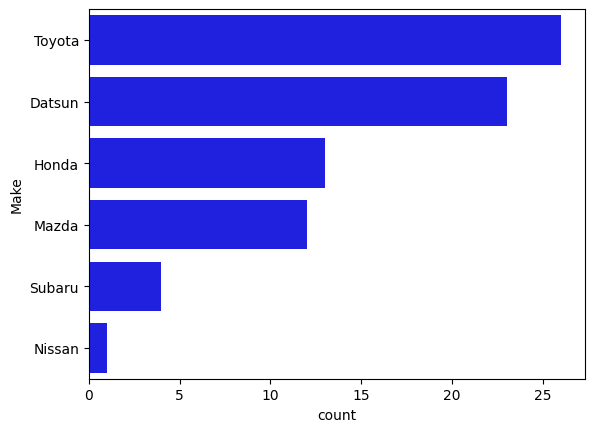

In [6]:
# Answer 10.1

japan_cars = cars.loc[cars["Origin"]=="Japan"]

sns.countplot(data = japan_cars,
              y='Make', 
              color='b',
              order = japan_cars['Make'].value_counts().index,
              )

### Box Plots

[.boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html) will create a basic boxplot that will automatically use to column name as the label.

**Basic code:**
* Single variable: <code>sns.boxplot(data = df, x = "column")</code>
* 2 variables:

```
sns.boxplot(data = df,
            x = "values_column",
            y = "category_column")
```

**Helpful Parameters:**
* <code>x, y</code>: Axis to plot on, x is a horizonta plot, y is a vertical plot
* <code>hue</code>: Further grouping/sub categories to plot
* <code>order</code>: Order to plot the categorical levels in, otherwise the levels are inferred from the data objects.

Text(0.5, 1.0, 'All Cars')

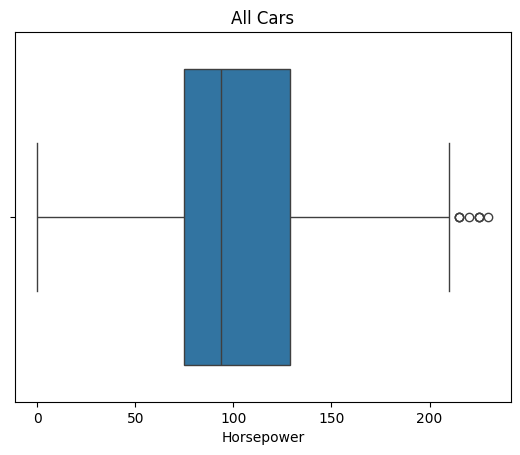

In [7]:
# Lets create a boxplot of horsepower
fig, ax = plt.subplots()
ax = sns.boxplot(data = cars,
                 x = "Horsepower",
                 )
ax.set_title("All Cars")

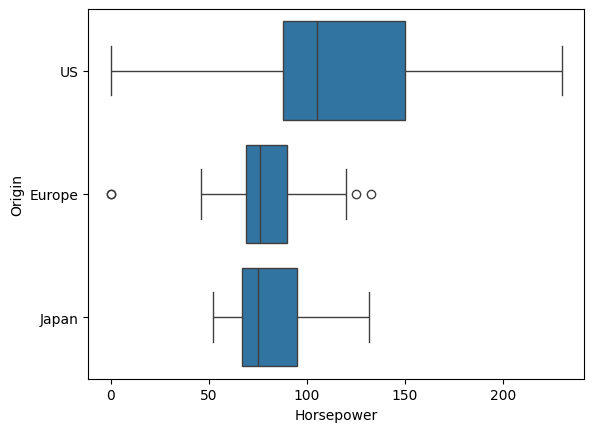

In [8]:
# now lets add Origin as a categorical variable
fig, ax = plt.subplots()
ax = sns.boxplot(data = cars,
                 x = "Horsepower",
                 y = "Origin",
                 )


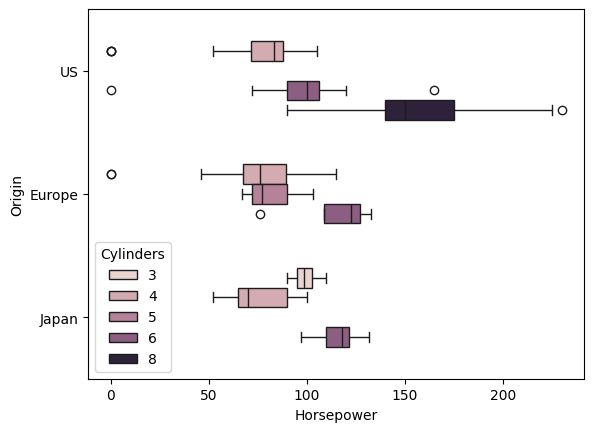

In [9]:
# We can add more granularity by dilenating by number of cylinders
# Going back to the introduction, does this make the data clearer for the reader?

fig, ax = plt.subplots()
ax = sns.boxplot(data = cars,
                 x = "Horsepower",
                 y = "Origin",
                 hue = "Cylinders",
                 )

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**Exercise 10.2** 

Build on the momentum from the last exercise to recreate the "best" plot example. 
    
* Use the filtered dataframe from the last exercise (Filtered to Japan as the Origin)
* Set up the axis so it plots horizontally
* Boxplots of "MPG" by "Make"
* Order the data median MPG per make
    * Hint: Use the same methodolgy to aggregate & sort values from the Pandas tutorial, using <code>.groupby()</code>, <code>.agg()</code> and <code>.sort_values()</code>, then use the <code>.index</code> from that sorted df as the order in the boxplot
</div>

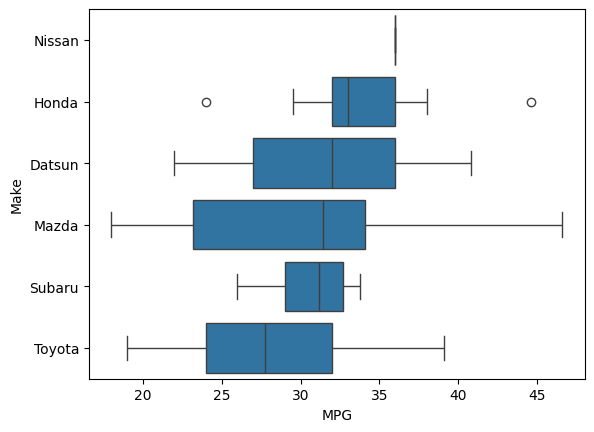

In [10]:
# Answer 10.2

# sorting the values
make_agg = japan_cars[['Make','MPG']].groupby('Make').agg(['median'])
make_agg.sort_values(by=[('MPG', 'median')], ascending = False, inplace=True)

# making the plot
fig, ax = plt.subplots()
ax = sns.boxplot(data = japan_cars,
                 x = "MPG",
                 y = "Make",
                 order = make_agg.index,
                 )


### Violin Plots

**<code>[.violinplot()](https://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot)</code>** will create a basic violin that will automatically use to column name as the label. It uses all the same parameters as boxplot. 

**Basic code**
* single variable: <code>sns.violinplot(data = df, x = "column")</code>
* 2 variables:
 ```
sns.violinplot(data = df,
                 x = "values_column",
                 y = "category_column")
```

**Helpful Parameters:**
* <code>x, y</code>: Axis to plot on
    * categorical column/variable on x is a vertical plot
    * categorical column/variable on y is a horizontal plot
* <code>scale</code> (optional):  ['area', 'density_norm', 'width']. The method used to scale the width of each violin.
    * area: each violin will have the same area
    * density_norm: the width of the violins will be scaled by the number of observations in that bin. 
    * width: each violin will have the same width.
* <code>bw</code> (optional): ['scott', 'silverman', float] Either the name of a reference rule or the scale factor to use when computing the kernel bandwidth. The actual kernel size will be determined by multiplying the scale factor by the standard deviation of the data within each bin.
* <code>hue</code> (optional): Further grouping/sub categories to plot
* <code>order</code> (optional): Order to plot the categorical levels in, otherwise the levels are inferred from the data objects.

<Axes: xlabel='Origin', ylabel='MPG'>

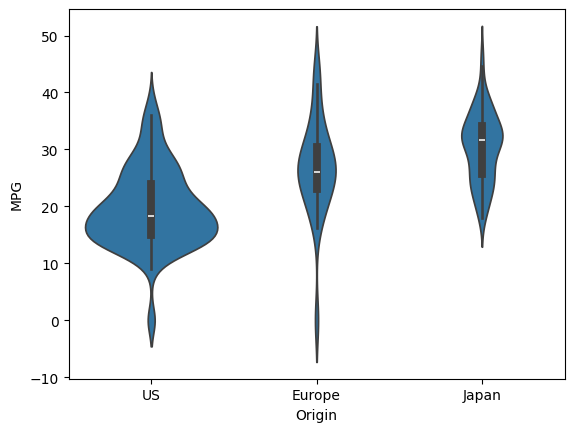

In [11]:
### Create a basic violin plot showing the distribution of miles per gallon by origin
### scale it by the count

sns.violinplot(data = cars,
               x = 'Origin', 
               y = 'MPG',
               density_norm = 'count',
               )

### Scatter Plots

**<code>[.scatter()]( https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot)</code>** Draw a scatter plot with possibility of several semantic groupings.

**Basic code**
```
 sns.scatterplot(data = df,
                  x = numeric column,
                  y = numeric column)
```

**Helpful Parameters:**
* <code>hue</code>: numeric, ordinal or categorical variable/column that will plotted as different colors
* <code>size</code>: numeric, ordinal or categorical variable/column that will produce points with different sizes. 
* <code>style</code>: categorical variable/column that will produce points with different markers.

<Axes: xlabel='Horsepower', ylabel='Weight'>

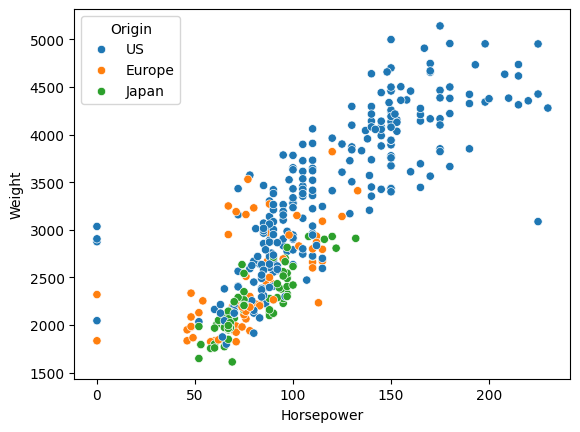

In [12]:
# Scatter plots work well with row level data
sns.scatterplot(data = cars,
                x = 'Horsepower', 
                y = 'Weight',
                hue = 'Origin'
               )

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**Exercise 10.3** 
 
Recreate the following plot:  
<img src="./support_files/images/data_viz/viz_student_exercise_mulivariate.png" width="500"/> 
    
Hint 2: take a look at the [seaborn scatterplot documentation and examples](https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot)
    
**Answer the following questions:** 
* How many variables are encoded?
* Is the encoding effective?
* Are there ways that it could be improved?

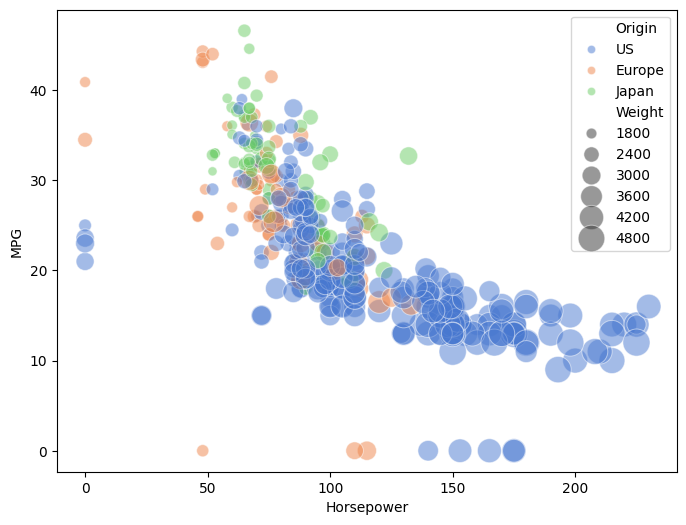

In [13]:
# Solution

fig, ax = plt.subplots(figsize=(8,6))

ax = sns.scatterplot(data=cars,
                     x="Horsepower", y="MPG", 
                     hue="Origin", size="Weight",
                     alpha=.5, palette="muted",
                     sizes=(40, 400))

## Distribution Plots

    
**Histograms**

A histogram is a classic visualization tool that represents distribution. There are two basic types of histograms: frequency and density.  
    
<b>Frequency</b> histograms display one or more variables by counting the number of observations that fall within disrete bins.
    
<b>Density</b> is a modified relative frequency histogram. That is, a density histogram is defined so that the area of each rectangle equals the relative frequency of the corresponding class, and the area of the entire histogram is always normalized to 1.
    
<img src="./support_files/images/data_viz/viz_histogram_generic.png" width="500"/> 

    
**Kernel Density Estimates**

A [kernel density estimate](https://en.wikipedia.org/wiki/Kernel_density_estimation) (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.
 
Relative to a histogram, KDE can produce a plot that is less cluttered and more interpretable, especially when drawing multiple distributions. But it has the potential to introduce distortions if the underlying distribution is bounded or not smooth. Like a histogram, the quality of the representation also depends on the selection of good smoothing parameters.
 
<img src="./support_files/images/data_viz/viz_hist_vs_KDE.png" width="500"/> 
    

### Histograms: Seaborn

Seaborn has several ways of creating histogram-like visualizations.

**[.histplot]( https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot):** the most straightforward histogram plot function
* Basic: <code>sns.histplot(data=df, x="column")</code>
* Density: <code>sns.histplot(data=df, x="column", stat="density")</code> 
* Basic with kde: sns.histplot(data=df, x="column", kde=True)
    
**[.kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot):** specializes in kernel density estimate plots
* Basic: <code>sns.kdeplot(data=df, x="column")</code>
* Multiple categories: <code>sns.kdeplot(data=df, x="column", hue="size")</code>
    * <code>bw_method</code> (optional): [string, scalar, or callable]  Method for determining the smoothing bandwidth to use; passed to scipy.stats.gaussian_kde.
    * <code>bw_adjust</code>(optional): number; Factor that multiplicatively scales the value chosen using bw_method. Increasing will make the curve smoother. See seaborn documentation.

**[.displot](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot):** the most flexible of the distribution plot functions
* Basic: <code>sns.displot(data=df, x="column", kind="hist")</code>
* Multiple categories: 
    <code>sns.displot(data=df, x="column", hue = "category_column", kind="hist")</code>
* The <code>kind</code> argument can be set to "hist", "kde" or "ecdf"

<Axes: xlabel='Weight', ylabel='Count'>

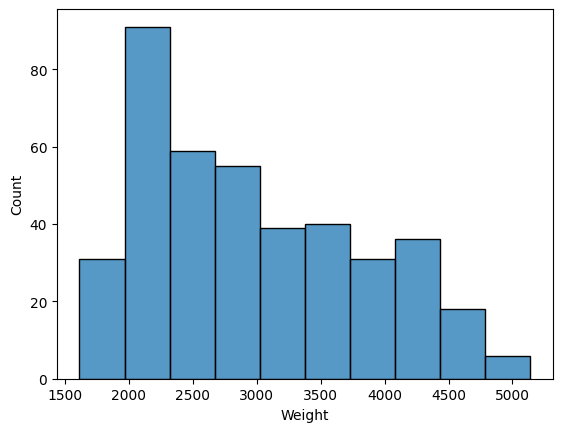

In [14]:
# Let's create a basic histogram of car weights
sns.histplot(data = cars, 
             x = "Weight")

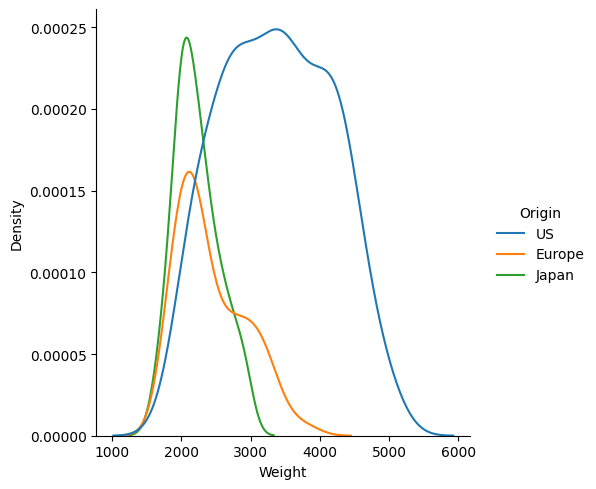

In [15]:
# Now, let's create a kde plot of weights categorized by origin
sns.displot(data = cars, 
             x = "Weight", 
             hue = "Origin", 
             kind = "kde")

### Lineplots

**[.lineplot]( https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot)** offers a line plot with possibility of several semantic groupings. It will automatically handle aggregation, and has built in functionality for drawing multiple lines based on category. 

**Basic code**
* Single variable:
```
sns.lineplot(data = df,
               x =  numeric column,
               y = numeric column)
```

**Helpful Parameters:**
* <code>hue</code>: Grouping variable that will produce lines with different colors
* <code>size</code>: Grouping variable that will produce lines with different widths
* <code>style</code>: Grouping variable that will produce lines with different dashes and/or markers
* <code>legend</code>:How to draw the legend
    * “auto”: choose between brief or full representation based on number of levels
    * “brief”: numeric hue and size variables will be represented with a sample of evenly spaced values
    * “full": every group will get an entry in the legend
    * False: no legend data is added and no legend is drawn
* <code>ci</code>: [int or “sd” or None] Size of the confidence interval to draw when aggregating with an estimator
    * “sd”: draw the standard deviation of the data
    * None: skips bootstrapping
    
**Note:**
* When there are multiple y-values for each x-value, seaborn will aggregate and compute the mean y-value, along with a 95% confidence interval around the mean.

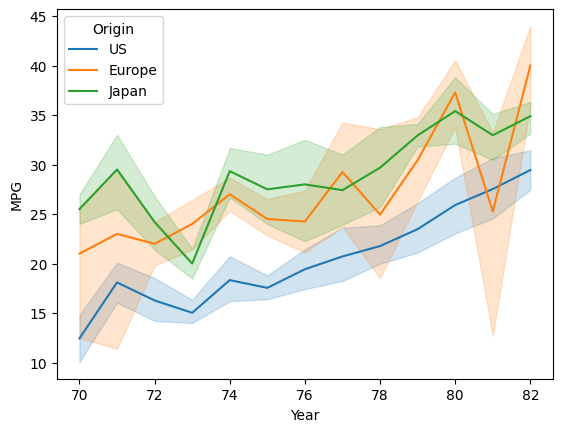

In [16]:
fig, ax = plt.subplots()
ax = sns.lineplot(data = cars,
             x="Year", 
             y="MPG",
             hue = "Origin",
            )

### Pair Grid

**[.pairgrid](https://seaborn.pydata.org/generated/seaborn.PairGrid.html)** provides a grid for plotting pairwise relationships in a dataset
    
In it's most basic form- the pair grid will simply create a blank grid of subplots with each row and one column corresponding to a numeric variable in the dataset. At that point you must map a type of plot onto the grid, for example a scatter plot. This will fill all the subplots with scatter plots of each pairwise relationship. You would still have access to all the scatterplot arguments like :<code>hue</code> and <code>size</code>.  However, there are also options to divide the pairplot into sections and plot things like histograms and other density estimators. 
    
<img src="./support_files/images/data_viz/pairgrid.png" width="900"/>     

**Basic code**

```
g = sns.PairGrid(df)
g.map(sns.scatterplot)
```
    
** Mapping Options**
<img src="./support_files/images/data_viz/pairgrid_sections.png" width="500"/>    
* <code>.map(seaborn plot type call)</code>:
* <code>.map_diag(seaborn plot type call)</code>: will plot a specific plot type on the diagonal
* <code>.map_offdiag(seaborn plot type call)</code>: will plot a specific plot type on the non-diagonal
* <code>.map_lower(seaborn plot type call)</code>: will plot a specific plot type below the diagonal
* <code>.map_upper(seaborn plot type call)</code>: will plot a specific plot type above the diagonal


**Helpful Parameters:**
* <code>hue</code>: Grouping variable that will produce lines with different colors
* <code>size</code>: Grouping variable that will produce lines with different widths. 
* <code>style</code>: Grouping variable that will produce lines with different dashes and/or markers.
* <code>legend</code>:How to draw the legend. 

  

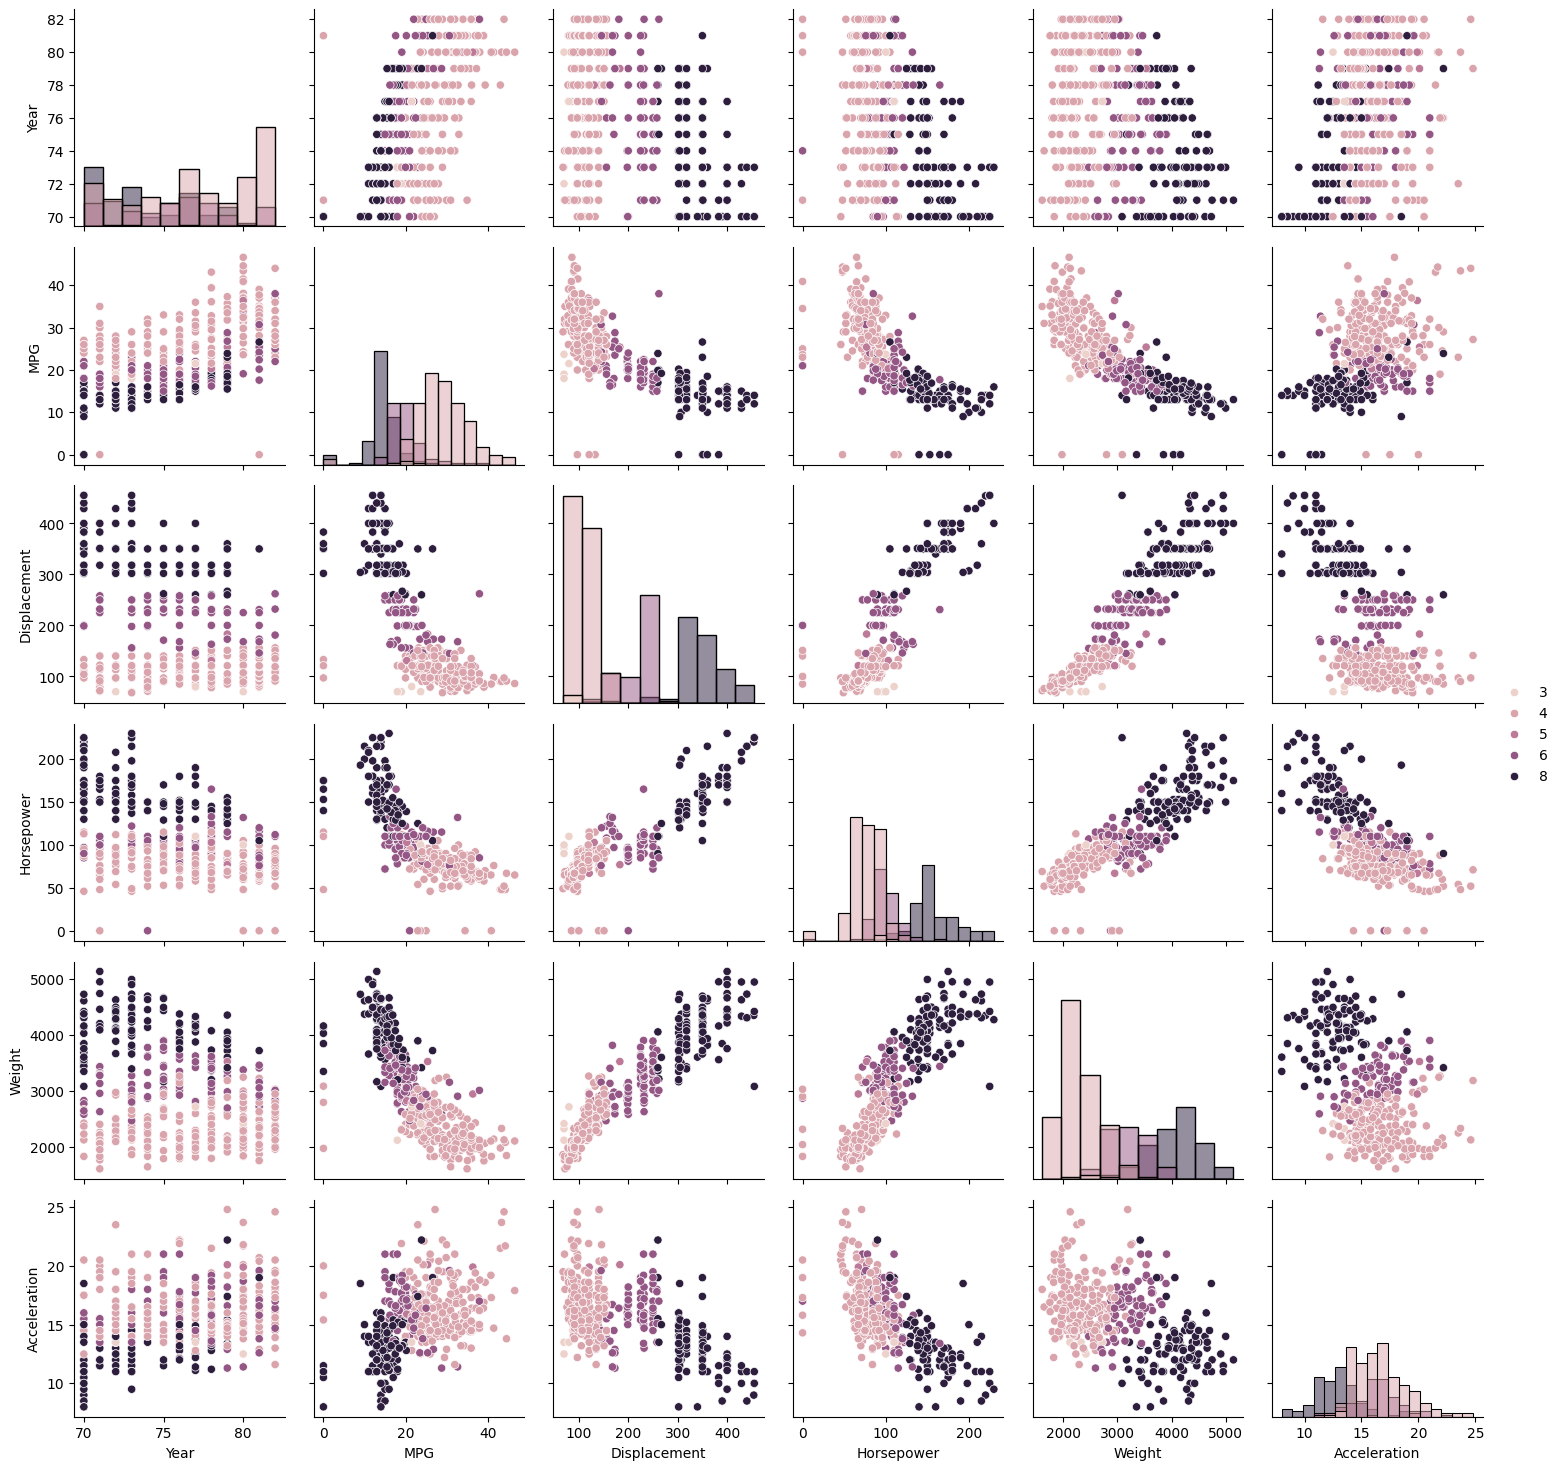

In [17]:
# Let's make a pair grid with histograms in the diagonal and scatter plots in the off diagonal
# Let's also color it by number of cylinders
# Note this is processor intensive and may take a few moments to render

g = sns.PairGrid(data = cars, 
                 hue="Cylinders")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend(title="", adjust_subtitles=True)

## Heatmaps & Correlation heatmaps

**Basic heatmap**
A heatmap is a type of matrix plot and graphical representation of data that uses a system of color-coding to represent different values. 
<br>    
<img src="./support_files/images/data_viz/viz_heatmap.png" width="600"/> 
<br>
    
**Correlation Heatmap**
A correlation heatmap specifically represents a correlation matrix, displaying the correlation between different variables. The value of correlation can take any value from -1 to 1. Correlation between two random variables or bivariate data does not necessarily imply a causal relationship. 
<br>
<img src="./support_files/images/data_viz/viz_heatmap_correlation.png" width="800"/> 
<br>
To create the correlation matrix for the visualizations, we will be using the pandas function
 **[.corr](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)**

### Basic Heatmaps

**With Matplotlib:**

If you have a table of values, making a very basic heatmap is incredibly easy! 
* <code>plt.imshow(df)</code>
<br>
<img src="./support_files/images/data_viz/viz_heatmap_matplotlib.png" width="200"/>


Creating plots like this is fine when you want a very quick visual assessment of the data. However, you might notice from the image above that it is not very interpretable, and is missing some really important information such as labels, annotated values, and color scale bar.
The Matplotlib code in the examples below goes over how to add all the bells and whistles
   
    
**With Seaborn:**

Heatmaps with seaborn are much more straightforward than with Matplotlib. Seaborn uses the **[.heatmap()](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap)** function. 

There's several optional parameters that can be used to easily adjust the colormap and color bar and other aesthetics. Please see the documentation linked above for more information. 
    
<code>sns.heatmap(data = df)</code>

NOTE: We will create a dataframe with synthetic data to work with for the basic heatmaps. This will use the techniques covered in the intro to pandas jupyter notebook

In [18]:
# first we will create a dataframe with randomly generated data to use for our heatmap
uniform_data = np.random.rand(6, 6)
heatmap_df = pd.DataFrame(uniform_data, columns=['col_1', 'col_2', 'col_3',
                                                 'col_4', 'col_5', 'col_6'])

Text(77.92222222222227, 0.5, 'Rows')

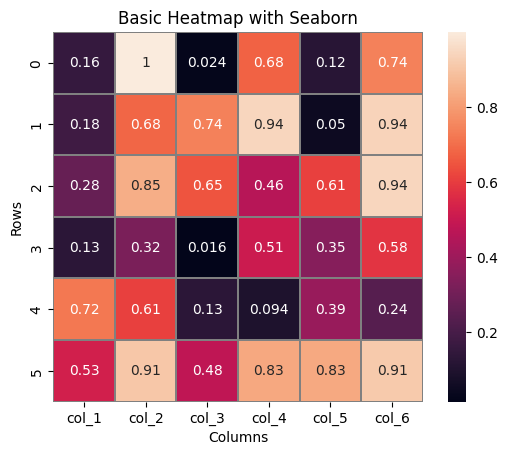

In [19]:
# basic heatmap with Seaborn

fig, ax = plt.subplots()
ax = sns.heatmap(data = heatmap_df,
                 annot=True,          # annotate with correlation values
                 linewidths=.1,       # matrix line widths
                 linecolor ='grey',   # matrix line color
                 square=True)

ax.set_title("Basic Heatmap with Seaborn")
ax.set_xlabel('Columns')
ax.set_ylabel('Rows')

### Correlation matrix

To create the correlation matrix for the visualizations, we will be using the pandas function
    **<code>[.corr()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)</code>**  

This function computes pairwise correlation of columns, excluding NA and null values.

<code>correlation_df = df.corr()</code>
   
Optional Parameters:
* <code>method</code> is the type of correlation to run. Options are:
    * 'pearson': default,  standard correlation coefficient
    * 'kendall': Kendall Tau correlation coefficient
    * 'spearman': Spearman rank correlation
    

In [24]:
# Let's make a very basic correlation matrix/dataframe using the cars dataset
correlation_df = cars.corr(numeric_only=True)
correlation_df

,Year,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration
Year,1.000000,0.586234,-0.360762,-0.381714,-0.419929,-0.315389,0.301992
MPG,0.586234,1.000000,-0.735563,-0.764277,-0.726670,-0.787510,0.424490
Cylinders,-0.360762,-0.735563,1.000000,0.951787,0.823467,0.895220,-0.522452
Displacement,-0.381714,-0.764277,0.951787,1.000000,0.873758,0.932475,-0.557984
Horsepower,-0.419929,-0.726670,0.823467,0.873758,1.000000,0.840811,-0.682047
Weight,-0.315389,-0.787510,0.895220,0.932475,0.840811,1.000000,-0.430086
Acceleration,0.301992,0.424490,-0.522452,-0.557984,-0.682047,-0.430086,1.000000


### Correlation heatmaps

When creating correlation plots, incorporating just a few elements will make them much more interpretable: 
* Colorbar (vmin, vmax) should span -1 to 1
* Diverging colormap:  with a neutral color in the middle to represent 0, some options are:

<br>
<img src="./support_files/images/data_viz/viz_diverging_colormaps.png" width="300"/> 
<br>    
<br>

We only need to made a few tweaks to the **[.heatmap()](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap)** code we used above to make a correlation based heatmap

Text(0.5, 1.0, 'Correlation Heatmap with Seaborn')

<Figure size 600x600 with 0 Axes>

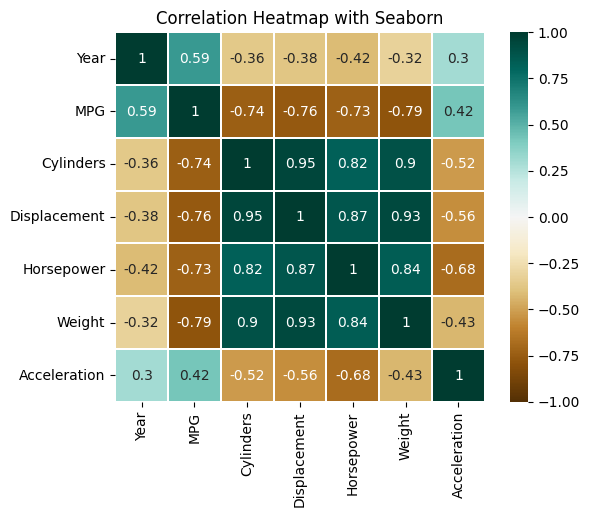

In [25]:
# Correlation heatmap with Seaborn:
plt.figure(figsize=(6,6))

fig, ax = plt.subplots()
ax = sns.heatmap(data = correlation_df,
                 cmap = 'BrBG',          # brown-teal diverging color map
                 vmin = -1, vmax = 1,    # set the colorbar range (-1 - 1 for correlation)
                 center = 0,             # set the center of the color bar
                 annot = True,           # annotate with correlation values
                 linewidths =.1,         # matrix line widths
                 linecolor ='white',     # matrix line color
                 square = True)
ax.set_title("Correlation Heatmap with Seaborn")

## Multi Plot Figures
 
**Figures with Subplots**

A given figure can have more than one axis. The subplot command, which we used above, generates a single axis by default. But we can specify the number of axes that we want.
    
<img src="./support_files/images/data_viz/viz_subplots.png" width="500"/> 

**[.subplots]( https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)**: creates a figure and a set of subplots. This utility wrapper makes it convenient to create common layouts of subplots, including the enclosing figure object, in a single call.


Text(0.5, 1.0, 'MPG distribution')

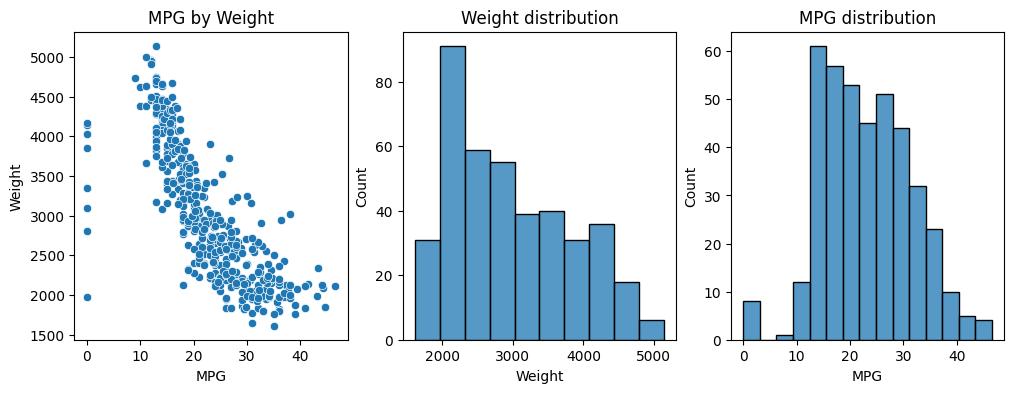

In [26]:
# Because Seaborn is built on Matplotlib we can also put multiple
# Seaborn plots in the same figure
# We just need to add the ax = axes[int] parameter

# Let's make subplots of MPG by weight and then the distributions
# for MPG and Weight

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4))

sns.scatterplot(x = "MPG",
                y = 'Weight',
                data = cars,
                ax = axes[0])

axes[0].set_title("MPG by Weight")

sns.histplot(x = "Weight", 
             data = cars,
             ax = axes[1])

axes[1].set_title("Weight distribution")

sns.histplot(x = "MPG", 
             data = cars,
             ax = axes[2])

axes[2].set_title("MPG distribution")

### gridspec: matplotlib


**General code example:** 

```
fig = plt.figure()
gridspec_fig = fig.add_gridspec(nrows=2, ncols=2)
ax0 = fig.add_subplot(gs[0, 0]) # Top left corner
ax1 = fig.add_subplot(gs[0, 1]) # Top right corner
ax2 = fig.add_subplot(gs[1, :]) # Bottom, span entire width
    
ax0.plot()
ax1.plot()
ax2.plot()
```
<br><br>
**Complex Figures with Gridspec**

**[Gridspec](http://matplotlib.org/users/gridspec.html)** is useful when you have uneven subplots. It can get tricky for more complex plots, so first try to use <code>ax.subplots()</code> (like in the previous examples).  
 
<img src="./support_files/images/data_viz/viz_gridspec.png" width="500"/> 
    
**helpful parameters:**
* <code> sharex/sharey = bool </code> forces plots to display the same range along the x-axis  or y-axis depending upon which parameter you call. Default = False

<Axes: xlabel='Year', ylabel='MPG'>

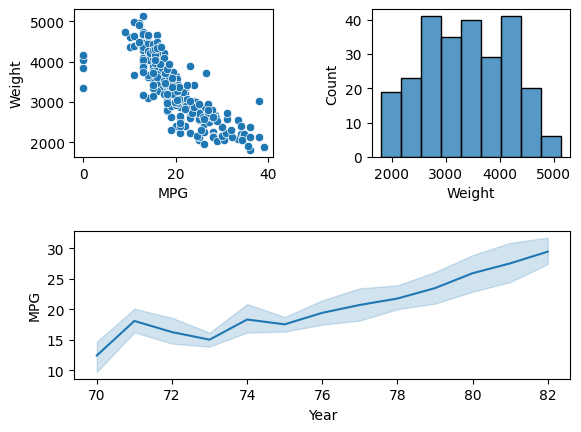

In [27]:
# Because Seaborn is built on Matplotlib we can also put multiple
# seaborn plots in the same figure.
# We just need to add the ax = axes[int] parameter

# Lets make a gridspec plot of MPG by weight and then the distributions
# for MPG and Weight

us_cars = cars.loc[cars["Origin"]=="US"]

fig = plt.figure()
plt.subplots_adjust(hspace = 0.5, wspace = 0.5) # Don't crowd your visualizations
gs= fig.add_gridspec(nrows=2, ncols=2)
ax0 = fig.add_subplot(gs[0, 0]) # Top left corner
ax1 = fig.add_subplot(gs[0, 1:]) # Top right corner
ax2 = fig.add_subplot(gs[1, :]) # Bottom, span entire width

sns.scatterplot(x = "MPG",
                y = 'Weight',
                data = us_cars,
                ax = ax0)
axes[0].set_title("MPG by Weight")

axes[1].set_title("")

sns.histplot(x = "Weight", 
             data = us_cars,
             ax = ax1)
axes[2].set_title("Weight distribution")


sns.lineplot(x="Year", 
             y="MPG",
             data = us_cars,
             ax = ax2)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**Exercise 10.4** 

Create separate subplot histograms that display Year and MPG for both the US and Japan. The US should dispaly in orange, and Japan in green.

</div>

Text(0.5, 1.0, 'MPG by Year (Japan)')

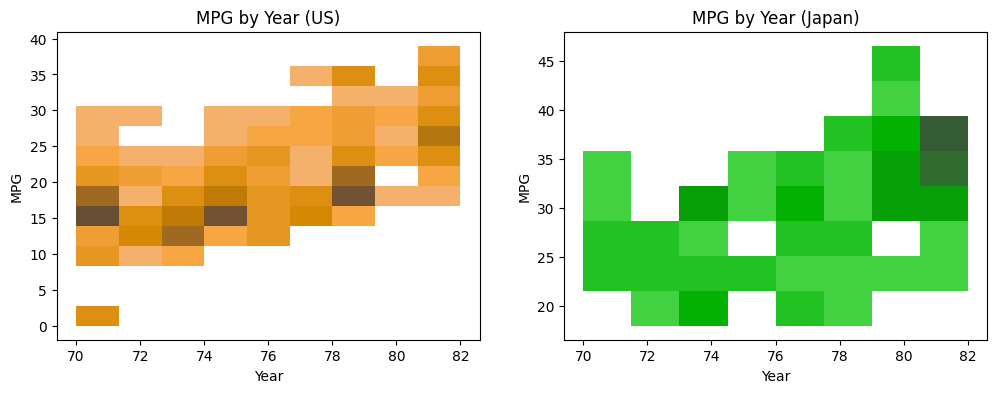

In [28]:
# Answer 10.4 
us_cars = cars.loc[cars["Origin"]=="US"]
jp_cars = cars.loc[cars["Origin"]=="Japan"]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

sns.histplot(x = "Year",
                y = 'MPG',
                data = us_cars,
                ax = axes[0],
                color = 'orange')

axes[0].set_title("MPG by Year (US)")

sns.histplot(x = "Year",
                y = 'MPG',
                data = jp_cars,
                ax = axes[1],
                color = 'green')

axes[1].set_title("MPG by Year (Japan)")

<Axes: xlabel='Year', ylabel='MPG'>

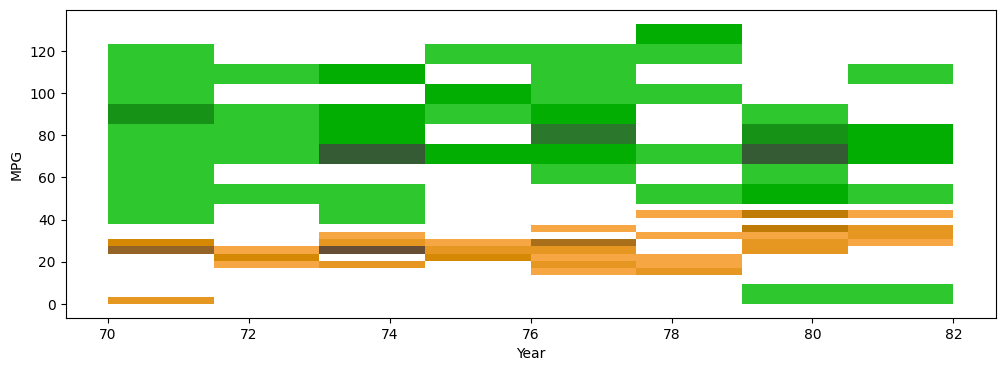

In [29]:
eu_cars = cars.loc[cars["Origin"]=="Europe"]
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,4))

sns.histplot(x = "Year",
                y = 'MPG',
                data = eu_cars,
                color = 'orange')

sns.histplot(x = "Year",
                y = 'Horsepower',
                data = eu_cars,
                color = 'green')